In [3]:
import pandas as pd
df=pd.read_csv('vh_data19.csv')
df=df[["Male","Age","Vaccine_Hesitant"]]
df

,Male,Age,Vaccine_Hesitant
0,1,67.0,1
1,1,70.0,0
2,0,69.0,0
3,0,64.0,1
4,1,56.0,0
...,...,...,...
3348,1,29.0,1
3349,1,56.0,0
3350,1,62.0,0
3351,1,49.0,0


In [5]:
rowdrops=[]
for x in df.index:
  if((df.loc[x,"Male"] not in [0,1]) or (df.loc[x,"Age"] not in range(0,110)) or (df.loc[x,"Vaccine_Hesitant"] not in [0,1])):
    rowdrops.append(x)
df=df.drop(rowdrops)



In [34]:
age_frequency={}
row_drop=set()
for i in df.index:
  if(df.loc[i,"Age"] not in age_frequency):
    age_frequency[df.loc[i,"Age"]]={"Total_Male":0,"Total_Female":0,"VH_Male":0,"VH_Female":0, "Percentage_VH_Female": 0, "Percentage_VH_Male": 0 }
  if(df.loc[i,"Male"]):
    age_frequency[df.loc[i,"Age"]]["Total_Male"]+=1
    if(df.loc[i,"Vaccine_Hesitant"]):
      age_frequency[df.loc[i,"Age"]]["VH_Male"]+=1
  else:
    age_frequency[df.loc[i,"Age"]]["Total_Female"]+=1
    if(df.loc[i,"Vaccine_Hesitant"]):
      age_frequency[df.loc[i,"Age"]]["VH_Female"]+=1

for age in age_frequency:
  if(age_frequency[age]["Total_Male"]>7):
    age_frequency[age]["Percentage_VH_Male"]=age_frequency[age]["VH_Male"]*100/age_frequency[age]["Total_Male"]
  else: 
    row_drop.add(age)
    
for age in age_frequency:
  if(age_frequency[age]["Total_Female"]>7):
    age_frequency[age]["Percentage_VH_Female"]=age_frequency[age]["VH_Female"]*100/age_frequency[age]["Total_Female"]
  else: 
    row_drop.add(age)
print(row_drop)  
for age in row_drop:
    del age_frequency[age]
age_frequency

{18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 32.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0}


{67.0: {'Total_Male': 77,
  'Total_Female': 41,
  'VH_Male': 17,
  'VH_Female': 6,
  'Percentage_VH_Female': 14.634146341463415,
  'Percentage_VH_Male': 22.07792207792208},
 70.0: {'Total_Male': 73,
  'Total_Female': 54,
  'VH_Male': 12,
  'VH_Female': 15,
  'Percentage_VH_Female': 27.77777777777778,
  'Percentage_VH_Male': 16.438356164383563},
 69.0: {'Total_Male': 59,
  'Total_Female': 56,
  'VH_Male': 5,
  'VH_Female': 4,
  'Percentage_VH_Female': 7.142857142857143,
  'Percentage_VH_Male': 8.474576271186441},
 64.0: {'Total_Male': 58,
  'Total_Female': 36,
  'VH_Male': 7,
  'VH_Female': 10,
  'Percentage_VH_Female': 27.77777777777778,
  'Percentage_VH_Male': 12.068965517241379},
 56.0: {'Total_Male': 32,
  'Total_Female': 37,
  'VH_Male': 6,
  'VH_Female': 12,
  'Percentage_VH_Female': 32.432432432432435,
  'Percentage_VH_Male': 18.75},
 68.0: {'Total_Male': 66,
  'Total_Female': 55,
  'VH_Male': 9,
  'VH_Female': 9,
  'Percentage_VH_Female': 16.363636363636363,
  'Percentage_VH_Mal

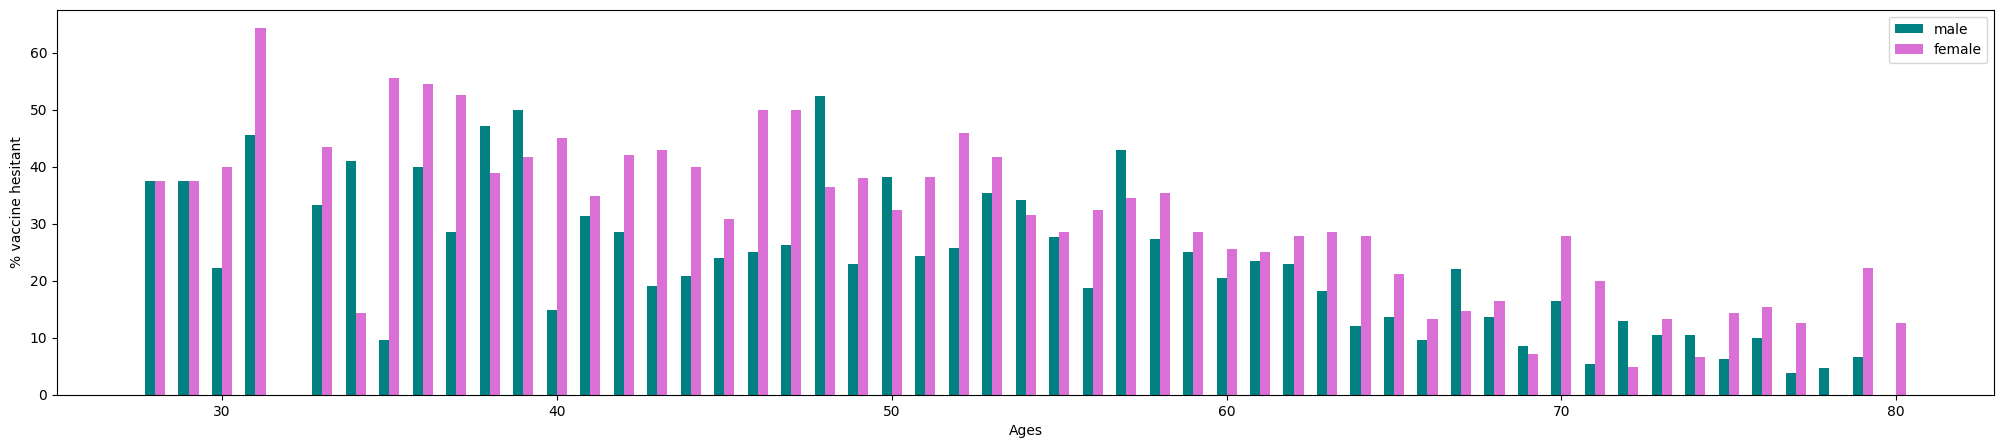

In [62]:
import matplotlib.pyplot as plt
import numpy as np
Percentage_VH_Male_List=[]
Percentage_VH_Female_List=[]
ages=[]
fig = plt.figure(figsize = (25, 5))
for age in age_frequency:
  Percentage_VH_Male_List.append(age_frequency[age]["Percentage_VH_Male"])
  Percentage_VH_Female_List.append(age_frequency[age]["Percentage_VH_Female"])
  ages.append(age)
Percentage_VH_Male=np.array(Percentage_VH_Male_List)
Percentage_VH_Female=np.array(Percentage_VH_Female_List)
ages_arr=np.array(ages)
rect1=plt.bar(ages_arr-0.15, Percentage_VH_Male_List, width=0.30, color='teal')
rect2=plt.bar(ages_arr+0.15, Percentage_VH_Female_List, width=0.30, color='orchid')
plt.xlabel("Ages")
plt.ylabel("% vaccine hesitant")
plt.legend((rect1[0], rect2[0]),("male", "female"))
plt.show()